In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import time
from random import randint
from IPython.display import clear_output
import plotly.graph_objects as go
import altair as alt
import pandas as pd
import seaborn as sns

In [2]:
def function(n, library):
    test_y = [randint(0, 100) for _ in range(n)]
    test_x = np.arange(0, n, 1)
    avg_time = 0
    for i in range(10):
        
        if library == "matplotlib":
            start = time.time()
            matplotlib_plot(test_x, test_y)
            
        if library == "plotly":
            start = time.time()
            plotly_plot(test_x, test_y)
            
        if library == "seaborn":
            start = time.time()
            seaborn_plot(test_x, test_y)
            
        end = time.time()
        avg_time += (end - start)
    return(avg_time/10)


def matplotlib_plot(test_x, test_y):
    plt.scatter(test_x,test_y)
    plt.show()

    
def plotly_plot(test_x, test_y):
    fig = go.Figure(data=go.Scatter(x=test_x, y=test_y))
    fig.show()
    
    
def seaborn_plot(test_x, test_y):
    sns.lineplot(x=test_x, y=test_y)

    
def test_function(max_value, steps, library):
    x, y = [], [] 
    for i in range(0, max_value+1, steps):
        y.append(function(i, library))
        x.append(i)
    return x, y
    

        
max_value = 50000
steps = int(max_value / 20) #Number of different sample sizes

In [3]:
# Time measure for plotly
x1, y1, = test_function(max_value, steps, "plotly")
clear_output(wait=True) # Clears jupyer notebook output
;

''

In [11]:
# Time measure for matplotlib
x2, y2 = test_function(max_value, steps, "matplotlib")
clear_output(wait=True) # Clears jupyer notebook output
;

''

''

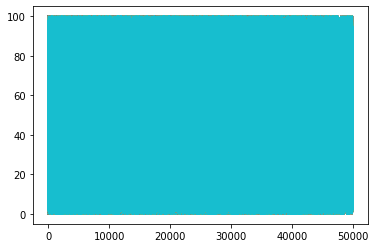

In [5]:
# Time measure for seaborn
x3, y3 = test_function(max_value, steps, "seaborn")
clear_output(wait=True) # Clears jupyer notebook output
;

In [9]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines',
                    name='plotly'))

fig.add_trace(go.Scatter(x=x2, y=y2,
                    mode='lines',
                    name='matplotlib'))

fig.add_trace(go.Scatter(x=x3, y=y3,
                    mode='lines',
                    name='seaborn'))

fig.update_layout(title='Average plotting time for n values Lineplot',
                   xaxis_title='Number of values plotted [n]',
                   yaxis_title='Avg time needed in [s]')


fig.update_yaxes(ticksuffix=" s")

In [7]:
print("Standard plot time without values:")
print("plotly = {} milliseconds".format(round(y1[0]* 1000, 2)))
print("matplotlib = {} milliseconds".format(round(y2[0]* 1000, 2)))
print("seaborn = {} milliseconds".format(round(y3[0]* 1000, 2)))

Standard plot time without values:
plotly = 202.56 milliseconds
matplotlib = 98.59 milliseconds
seaborn = 7.62 milliseconds


In [8]:
print("Additional time vor n values:")
print("plotly = {} milliseconds per 1000 values".format( round((y1[-1] - y1[0]) / (x1[-1] - x1[0]) * 1000 * 1000, 2)))
print("matplotlib = {} milliseconds per 1000 values".format( round((y2[-1] - y2[0]) / (x2[-1] - x2[0]) * 1000 * 1000, 2)))
print("seaborn = {} milliseconds per 1000 values".format( round((y3[-1] - y3[0]) / (x3[-1] - x3[0]) * 1000 * 1000, 2)))

Additional time vor n values:
plotly = 6.02 milliseconds per 1000 values
matplotlib = 9.64 milliseconds per 1000 values
seaborn = 51.43 milliseconds per 1000 values
